# Predict Model

In [1]:
# Import basic functionality
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
import re
import os

In [2]:
# Read the data
sentencing_cleaned = pd.read_csv("/Users/leowu/Desktop/Study_Materials/Data_Science1/pset2_inputdata/sentencing_cleaned.csv")

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/3105782160.py:2: DtypeWarning: Columns (10,11,16,25) have mixed types. Specify dtype option on import or set low_memory=False.


In [3]:
# Get the head of the data
sentencing_cleaned.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
2,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
3,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
4,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314


# To judge whether people will incarcerated or not

In [186]:
sentencing_cleaned.COMMITMENT_TYPE.value_counts().head(5)

Illinois Department of Corrections       68241
Probation                                46540
Cook County Department of Corrections     5044
710/410 Probation                         3813
Conditional Discharge                     2270
Name: COMMITMENT_TYPE, dtype: int64

In [187]:
## Rename the COMMITMENT_TYPE to rename incarceration as 1, and others as 0
## incarceration is indicated by COMMITMENT_TYPE == "Illinois Department of Corrections"
sentencing_cleaned['Incar'] = np.where(sentencing_cleaned.COMMITMENT_TYPE == 'Illinois Department of Corrections', True , False)
sentencing_cleaned.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,Incar
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40,True
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310,True
2,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162,True
3,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331,False
4,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314,False


In [188]:
sentence_filter1 = sentencing_cleaned[(~sentencing_cleaned.COMMITMENT_TERM.isin(['18 months','30 months']))
                                     & (sentencing_cleaned.COMMITMENT_UNIT.isin(['Days','Hours','Year(s)','Months','Weeks','Natural Life']))]
sentence_filter1.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,Incar
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40,True
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310,True
2,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162,True
3,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331,False
4,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314,False


In [189]:
## Change the units to year
def transition(df: pd.DataFrame):
    df['senlength_derived'] = [float(u)
      if v == 'Year(s)'
      else float(float(u) / (24*365)) 
           if v == 'Hours'
           else float(float(u)/ 365) 
                if v == 'Days'
                else float(float(u)/ 12) 
                    if v == 'Months'
                    else float(float(u) *7 / 365) 
                        if v == 'Weeks'
                        else float(100-20)
                               if (v == 'Natural Life') & (np.isnan(i))
                               else float(100-float(i)) 
      for u,v,i in zip(df.COMMITMENT_TERM,df.COMMITMENT_UNIT,df.age_derived)]
    
    return df

In [190]:
sentencing_cleaned_upd = transition(df = sentence_filter1)
sentencing_cleaned_upd.head()

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/4129742438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,Incar,senlength_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40,True,62.0
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310,True,70.0
2,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162,True,3.0
3,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331,False,2.0
4,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314,False,2.0


In [192]:
sentencing_inc = sentencing_cleaned_upd[['is_changed_offense','is_black_derived','is_hisp_derived'\
                                         ,'is_white_derived','is_male_derived','senlength_derived','Incar']]
sentencing_inc.head()

,is_changed_offense,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived,Incar
0,True,True,False,False,True,62.0,True
1,True,True,False,False,True,70.0,True
2,False,False,True,False,True,3.0,True
3,True,True,False,False,False,2.0,False
4,False,False,False,True,True,2.0,False


### Rename the True/False column, change True to 1, False to 0

In [193]:
le = LabelEncoder()
le.fit(sentencing_inc['is_black_derived']) 
sentencing_inc['is_black_derived'] = le.transform(sentencing_inc['is_black_derived'])   
sentencing_inc['is_white_derived'] = le.transform(sentencing_inc['is_white_derived'])
sentencing_inc['is_hisp_derived'] = le.transform(sentencing_inc['is_hisp_derived'])
sentencing_inc['is_male_derived'] = le.transform(sentencing_inc['is_male_derived'])
sentencing_inc['is_changed_offense'] = le.transform(sentencing_inc['is_changed_offense'])
sentencing_inc['Incar'] = le.transform(sentencing_inc['Incar'])

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/944494596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/944494596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/944494596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [194]:
sentencing_inc.head()

,is_changed_offense,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived,Incar
0,1,1,0,0,1,62.0,1
1,1,1,0,0,1,70.0,1
2,0,0,1,0,1,3.0,1
3,1,1,0,0,0,2.0,0
4,0,0,0,1,1,2.0,0


In [206]:
## Describe the data
sentencing_inc.describe(include='all')

,is_changed_offense,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived,Incar
count,133373.000000,133373.000000,133373.000000,133373.000000,133373.000000,133373.000000,133373.000000
mean,0.100763,0.653551,0.186282,0.152227,0.871308,2.859283,0.511543
std,0.301015,0.475840,0.389336,0.359242,0.334860,4.286118,0.499869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,405.000000,1.000000


## Test different models

### Logistic Regression Model

In [195]:
y = sentencing_inc.Incar.values
X = sentencing_inc.drop(['Incar'], axis = 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6)  

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test) 

In [196]:
## Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

log_reg.score(X_train,y_train)

0.6324265962870768

In [197]:
log_reg.score(X_test,y_test)

0.6330074376199616

In [198]:
from sklearn.metrics import accuracy_score
y_predict_log = log_reg.predict(X_test)

# Get the accuracy
accuracy_score(y_test,y_predict_log)

0.6330074376199616

In [199]:
## Get f1-score
from sklearn.metrics import f1_score

print(f1_score(y_test,y_predict_log))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_log))

0.6335459527445872
              precision    recall  f1-score   support

           0       0.62      0.65      0.63     16308
           1       0.65      0.62      0.63     17036

    accuracy                           0.63     33344
   macro avg       0.63      0.63      0.63     33344
weighted avg       0.63      0.63      0.63     33344



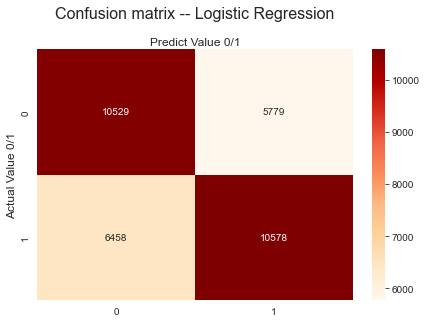

In [200]:
## Create Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict_log)
cnf_matrix

def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

# Create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('Actual Value 0/1',fontsize=12)
    plt.xlabel('Predict Value 0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')

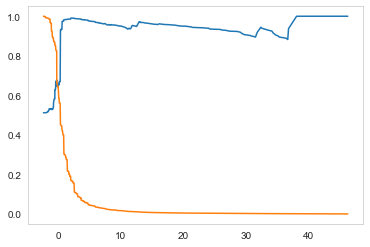

In [201]:
decision_scores = log_reg.decision_function(X_test)

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show() 

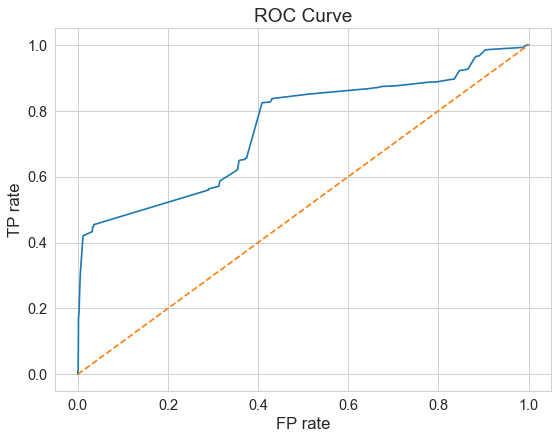

In [202]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fprs,tprs,thresholds = roc_curve(y_test,decision_scores)

def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC Curve',fontsize=17)
    plt.show()
    
plot_roc_curve(fprs,tprs)

In [203]:
# Get the area, which is equal to score
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_test,decision_scores)

0.7472014852847652

## KNN Neighbor Model

In [237]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,31)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,31)],
        'p':[i for i in range(1,6)]
    }
]

In [238]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf,param_grid)

grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [239]:
grid_search.best_score_

0.8264803128419136

In [240]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_train,y_train)

0.8279698887322676

In [241]:
knn_clf.score(X_test,y_test)

0.8272852687140115

In [242]:
## Get F1-score
y_predict_knn = knn_clf.predict(X_test)
f1_score(y_test,y_predict_knn)

0.8182879500205092

In [243]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     16308
           1       0.88      0.76      0.82     17036

    accuracy                           0.83     33344
   macro avg       0.83      0.83      0.83     33344
weighted avg       0.83      0.83      0.83     33344



In [244]:
## Get the matrix
cnf_matrix = confusion_matrix(y_test,y_predict_knn)
cnf_matrix

array([[14618,  1690],
       [ 4069, 12967]])

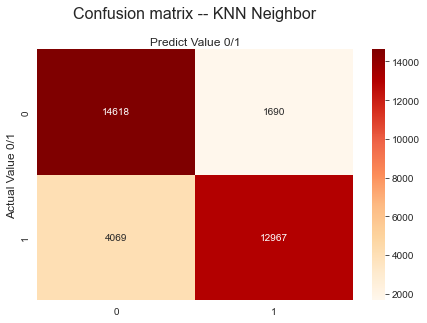

In [245]:
# Plot the matrix graph
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- KNN Neighbor')

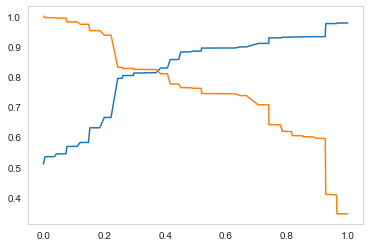

In [246]:
## Plot line graph
y_probabilities = knn_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()    

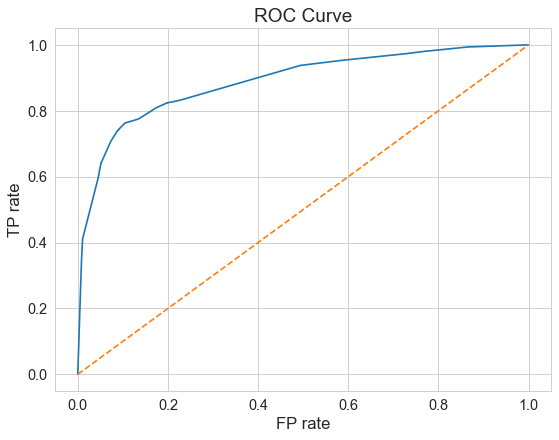

In [247]:
## Plot the ROC Curve
from sklearn.metrics import roc_curve
fprs2,tprs2,thresholds2 = roc_curve(y_test,y_probabilities)
plot_roc_curve(fprs2,tprs2)

In [248]:
# Get the area, which is equal to the score
from sklearn.metrics import roc_auc_score  
roc_auc_score(y_test,y_probabilities)

0.8886227465011836

## Decision Tree

In [225]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=6)

In [226]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'max_features':['auto','sqrt','log2'],
        'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]
    }
]
grid_search = GridSearchCV(dt_clf,param_grid)

grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=6),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18]}])

In [227]:
grid_search.best_estimator_

DecisionTreeClassifier(max_features='auto', min_samples_leaf=7, random_state=6)

In [228]:
grid_search.best_score_

0.8269001908775031

In [229]:
dt_clf = grid_search.best_estimator_
dt_clf.score(X_train,y_train)

0.8272401003708925

In [230]:
## Get F1-score
y_predict_dt = dt_clf.predict(X_test)
f1_score(y_test,y_predict_dt)

0.8178086517208714

In [231]:
## Plot the matrix
print(classification_report(y_test,y_predict_dt))
cnf_matrix = confusion_matrix(y_test,y_predict_dt)
cnf_matrix

              precision    recall  f1-score   support

           0       0.78      0.90      0.84     16308
           1       0.88      0.76      0.82     17036

    accuracy                           0.83     33344
   macro avg       0.83      0.83      0.83     33344
weighted avg       0.83      0.83      0.83     33344



array([[14624,  1684],
       [ 4086, 12950]])

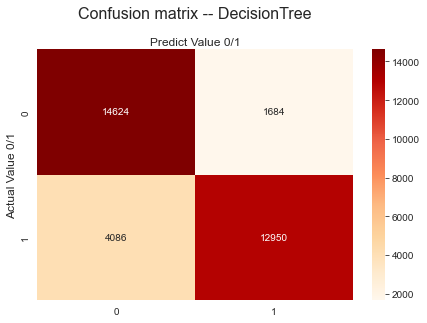

In [232]:
## Plot the heat graph
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- DecisionTree')

In [233]:
y_probabilities = dt_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

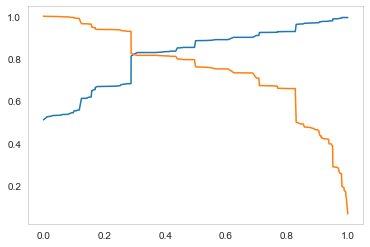

In [234]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()   

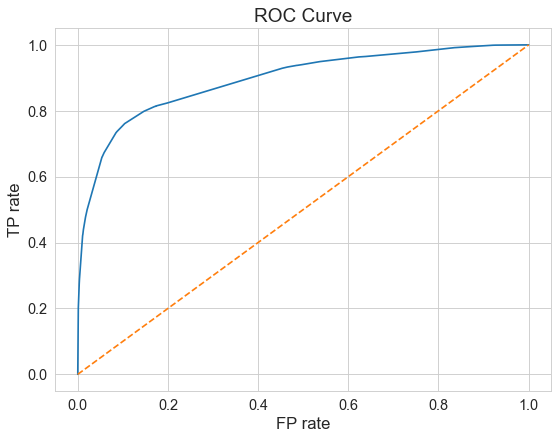

In [235]:
## Plot the ROC Curve
from sklearn.metrics import roc_curve
fprs3,tprs3,thresholds3 = roc_curve(y_test,y_probabilities)
plot_roc_curve(fprs3,tprs3)

In [236]:
# Get the area, which is equal to score
from sklearn.metrics import roc_auc_score  

roc_auc_score(y_test,y_probabilities)

0.8940774407489129

## Change the classifier to VotingClassifier

In [209]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
        ('log_clf',log_reg),
        ('knn_clf',knn_clf),
        ('dt_clf',dt_clf)
],voting='soft')

In [210]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression()),
                             ('knn_clf', KNeighborsClassifier()),
                             ('dt_clf',
                              DecisionTreeClassifier(random_state=6))],
                 voting='soft')

In [211]:
voting_clf.score(X_train,y_train)

0.8168631096981875

In [212]:
voting_clf.score(X_test,y_test)

0.815978886756238

In [213]:
## Get the F1-score
y_predict_voting = voting_clf.predict(X_test)
f1_score(y_test,y_predict_voting)

0.7999478351591027

In [214]:
## Plot the matrix
print(classification_report(y_test,y_predict_voting))
cnv_matrix = confusion_matrix(y_test,y_predict_voting)
cnv_matrix

              precision    recall  f1-score   support

           0       0.76      0.92      0.83     16308
           1       0.90      0.72      0.80     17036

    accuracy                           0.82     33344
   macro avg       0.83      0.82      0.81     33344
weighted avg       0.83      0.82      0.81     33344



array([[14940,  1368],
       [ 4768, 12268]])

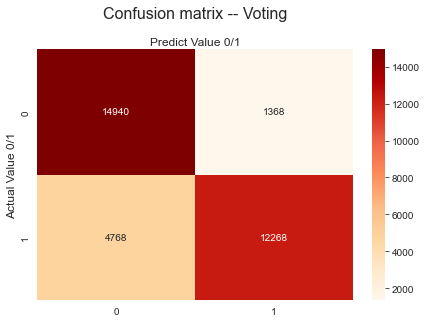

In [215]:
## Plot the heat graph
plot_cnf_matirx(cnv_matrix,'Confusion matrix -- Voting')

In [216]:
# Get the area, which is equal to score
from sklearn.metrics import roc_auc_score
y_probabilities = voting_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities)

0.8893090627514729

## Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500,random_state=666,oob_score=True,n_jobs=-1)
rf_clf.fit(X,y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=666)

In [218]:
rf_clf.oob_score_

0.8267640376987846

In [219]:
rf_clf.score(X_test,y_test)

/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


0.5149952015355086

In [250]:
## Get the F1-score
y_predict_rf = rf_clf.predict(X_test)
f1_score(y_test,y_predict_rf)

/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


0.09845021741554241

In [251]:
print(classification_report(y_test,y_predict_rf))
cnv_matrix = confusion_matrix(y_test,y_predict_rf)
cnv_matrix

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     16308
           1       0.98      0.05      0.10     17036

    accuracy                           0.51     33344
   macro avg       0.74      0.53      0.38     33344
weighted avg       0.75      0.51      0.38     33344



array([[16289,    19],
       [16153,   883]])

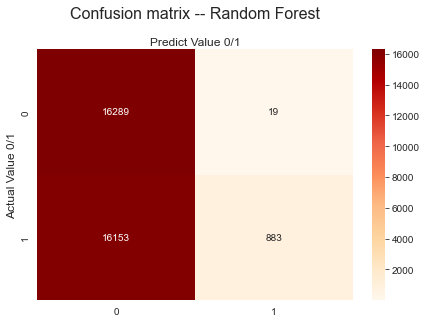

In [252]:
## Plot the heat graph
plot_cnf_matirx(cnv_matrix,'Confusion matrix -- Random Forest')

In [255]:
y_probabilities_rf = rf_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities_rf)

/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


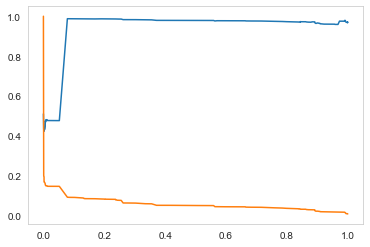

In [256]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()   

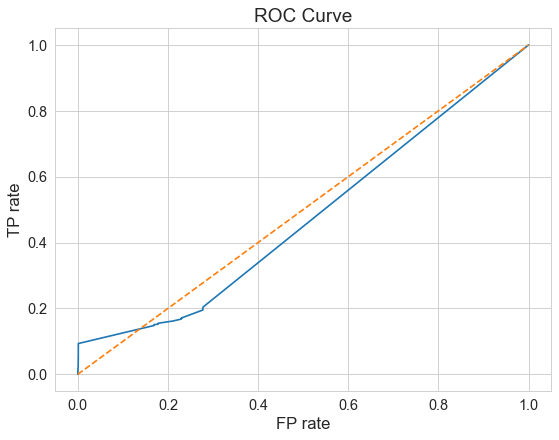

In [254]:
# Plot ROC Curve
from sklearn.metrics import roc_curve
fprs4,tprs4,thresholds4 = roc_curve(y_test,y_probabilities_rf)
plot_roc_curve(fprs4,tprs4)

In [253]:
## Get the area, which is equal to score

roc_auc_score(y_test,y_probabilities_rf)

/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


0.4735148847672444

## Plot these ROC Curve together

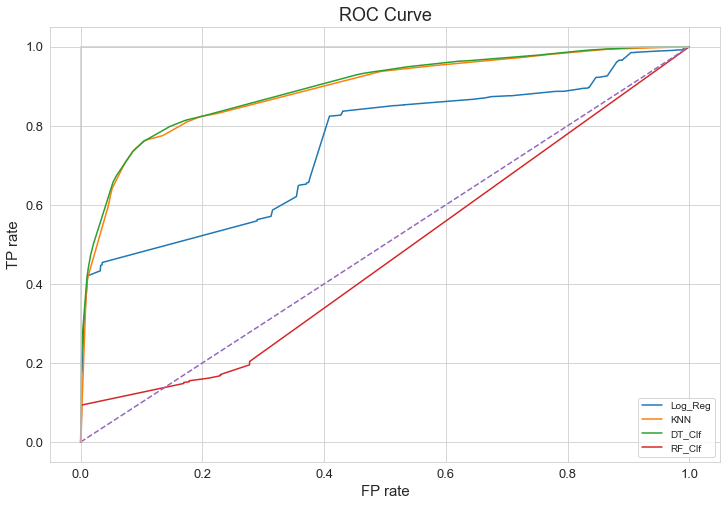

In [249]:
## Plot these curve together
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('ROC Curve',fontsize=18)
plt.plot(fprs,tprs,label='Log_Reg')
plt.plot(fprs2,tprs2,label='KNN')
plt.plot(fprs3,tprs3,label='DT_Clf')
plt.plot(fprs4,tprs4,label='RF_Clf')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.8')
plt.plot([1,1],c='.8')
plt.ylabel('TP rate',fontsize=15)
plt.xlabel('FP rate',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

## Another df

# Transfer the units of sentence length into year
### Subset the certain type of commitment term and unit

In [7]:
sentence_filter = sentencing_cleaned[(~sentencing_cleaned.COMMITMENT_TERM.isin(['18 months','30 months']))
                                     & (sentencing_cleaned.COMMITMENT_UNIT.isin(['Days','Hours','Year(s)','Months','Weeks','Natural Life']))]
sentence_filter.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
2,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
3,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
4,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314


In [36]:
## Change the units to year
def transition(df: pd.DataFrame):
    df['senlength_derived'] = [float(u)
      if v == 'Year(s)'
      else float(float(u) / (24*365)) 
           if v == 'Hours'
           else float(float(u)/ 365) 
                if v == 'Days'
                else float(float(u)/ 12) 
                    if v == 'Months'
                    else float(float(u) *7 / 365) 
                        if v == 'Weeks'
                        else float(100-20)
                               if (v == 'Natural Life') & (np.isnan(i))
                               else float(100-float(i)) 
      for u,v,i in zip(df.COMMITMENT_TERM,df.COMMITMENT_UNIT,df.age_derived)]
    
    return df

In [38]:
sentencing_cleaned_up = transition(df = sentence_filter)
sentencing_cleaned_up.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,senlength_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40,62.0
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310,70.0
2,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162,3.0
3,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331,2.0
4,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314,2.0


In [53]:
from sklearn import linear_model
from sklearn.model_selection import  cross_val_score
from sklearn.preprocessing import LabelEncoder

### Rename the True/False column, change True to 1, False to 0

In [42]:
le = LabelEncoder()
le.fit(sentence_cleaned['is_black_derived']) 
sentence_cleaned['is_black_derived'] = le.transform(sentence_cleaned['is_black_derived'])   
sentence_cleaned['is_white_derived'] = le.transform(sentence_cleaned['is_white_derived'])
sentence_cleaned['is_hisp_derived'] = le.transform(sentence_cleaned['is_hisp_derived'])
sentence_cleaned['is_male_derived'] = le.transform(sentence_cleaned['is_male_derived'])

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/3356775588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/3356775588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/3356775588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

# To research the predict model more precisely, we focus on the Illinois Department

In [89]:
## Subset to the Illinois Department
sentence_filter1 = sentencing_cleaned[(sentencing_cleaned.COMMITMENT_TYPE == 'Illinois Department of Corrections') 
                                     & ((sentencing_cleaned.is_white_derived == True)| (sentencing_cleaned.is_black_derived == True)) 
                                     & (~sentencing_cleaned.COMMITMENT_UNIT.isin(['Term','Pounds','Dollars']))]
sentence_filter1.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
1,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
5,155685924389,221749325828,6/15/2001 12:00:00 AM,PROMIS Conversion,True,55017536987,687589180737,AGGRAVATED CRIMINAL SEXUAL ASSAULT,1,5/3/2013 12:00:00 AM,...,PROMIS Conversion,True,False,False,False,True,NaN,2013-05-03,2013-05-01,judge_287
7,156558681704,231553844285,7/17/2001 12:00:00 AM,PROMIS Conversion,True,58235136444,720561595284,2ND DEGREE MURDER,1,12/4/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,17.0,2014-12-04,2014-12-01,judge_329
9,156996749190,238415836990,10/20/2001 12:00:00 AM,PROMIS Conversion,True,58424726399,219609793234,MURDER/INTENT TO KILL/INJURE,1,3/14/2012 12:00:00 AM,...,Homicide,True,False,False,False,True,23.0,2012-03-14,2012-03-01,judge_113


### Subset the column we will use

In [90]:
sentencing_chi = transition(df = sentence_filter1)
sentencing_chi = sentencing_chi[['is_black_derived','is_white_derived','is_male_derived','senlength_derived','SENTENCE_TYPE']]
sentencing_chi.head()

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/1234244138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,is_black_derived,is_white_derived,is_male_derived,senlength_derived,SENTENCE_TYPE
0,True,False,True,62.0,Prison
1,True,False,True,70.0,Prison
5,True,False,True,10.0,Prison
7,True,False,True,20.0,Prison
9,True,False,True,45.0,Prison


## View the type of sentence

In [91]:
sentencing_chi.groupby('SENTENCE_TYPE').agg(Number = ('senlength_derived', 'count')).reset_index().sort_values(by='Number',ascending=False)

,SENTENCE_TYPE,Number
6,Prison,57332
5,Jail,759
7,Probation,115
9,Probation Terminated Unsatisfactorily,45
4,Death,26
1,Conditional Discharge,4
0,2nd Chance Probation,3
10,Supervision,2
2,Conditional Release,1
3,Cook County Boot Camp,1


## To predict whether people will be prison or others, we rename prison as 1, others as 0

In [93]:
## Only to predict whether they will be prison or others(Name prison as 1, others as 0)
sentencing_chi['Updated'] = np.where(sentencing_chi.SENTENCE_TYPE == 'Prison', True , False)
sentencing_chi.head()

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/388141005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,is_black_derived,is_white_derived,is_male_derived,senlength_derived,SENTENCE_TYPE,Updated
0,True,False,True,62.0,Prison,True
1,True,False,True,70.0,Prison,True
5,True,False,True,10.0,Prison,True
7,True,False,True,20.0,Prison,True
9,True,False,True,45.0,Prison,True


In [95]:
## Rename the True/False column, change True to 1, False to 0
le = LabelEncoder()
le.fit(sentencing_chi['is_black_derived']) 
sentencing_chi['is_black_derived'] = le.transform(sentencing_chi['is_black_derived'])   
sentencing_chi['is_white_derived'] = le.transform(sentencing_chi['is_white_derived'])
sentencing_chi['Updated'] = le.transform(sentencing_chi['Updated'])
sentencing_chi['is_male_derived'] = le.transform(sentencing_chi['is_male_derived'])
sentencing_chi.head()

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/937755227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/937755227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/937755227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,is_black_derived,is_white_derived,is_male_derived,senlength_derived,SENTENCE_TYPE,Updated
0,1,0,1,62.0,Prison,1
1,1,0,1,70.0,Prison,1
5,1,0,1,10.0,Prison,1
7,1,0,1,20.0,Prison,1
9,1,0,1,45.0,Prison,1


# Test different models

## Logistic Regression Model

In [99]:
y = sentencing_chi.Updated.values
X = sentencing_chi.drop(['Updated','SENTENCE_TYPE'], axis = 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6)  

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test) 


In [100]:
## Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

from sklearn.metrics import accuracy_score
y_predict_log = log_reg.predict(X_test)

# Get the accuracy
accuracy_score(y_test,y_predict_log)


0.9831183090859182
0.9849722088794346


0.9849722088794346

In [102]:
## Get f1-score
from sklearn.metrics import f1_score

print(f1_score(y_test,y_predict_log))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_log))

0.9924292183772946
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.98      1.00      0.99     14354

    accuracy                           0.98     14573
   macro avg       0.49      0.50      0.50     14573
weighted avg       0.97      0.98      0.98     14573



/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


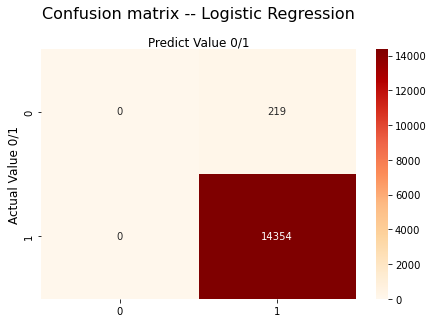

In [103]:
## Create Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict_log)
cnf_matrix

def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

# Create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('Actual Value 0/1',fontsize=12)
    plt.xlabel('Predict Value 0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')

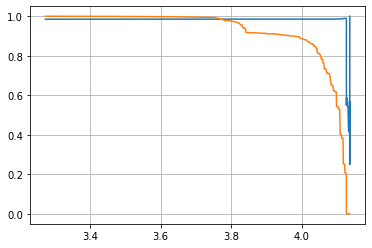

In [104]:
decision_scores = log_reg.decision_function(X_test)

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()  

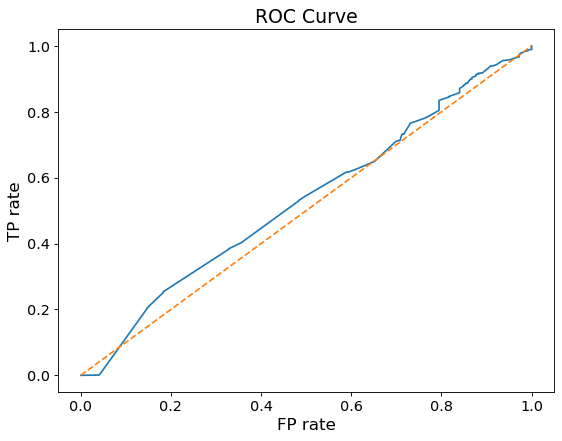

In [105]:
# Plot ROC curve
from sklearn.metrics import roc_curve

fprs,tprs,thresholds = roc_curve(y_test,decision_scores)

def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC Curve',fontsize=17)
    plt.show()
    
plot_roc_curve(fprs,tprs)

In [106]:
# Get the area, which is equal to score
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_test,decision_scores)

0.5295297382620663

## KNN Neighbor Model

In [165]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,31)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,31)],
        'p':[i for i in range(1,6)]
    }
]

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf,param_grid)

grid_search.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [167]:
grid_search.best_score_

0.9833241838536834

In [168]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_train,y_train)

0.9838045566840516

In [169]:
knn_clf.score(X_test,y_test)

0.9846977286763192

In [170]:
## Get F1-score
y_predict_knn = knn_clf.predict(X_test)
f1_score(y_test,y_predict_knn)

0.992287206446927

In [171]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.36      0.02      0.04       219
           1       0.99      1.00      0.99     14354

    accuracy                           0.98     14573
   macro avg       0.67      0.51      0.52     14573
weighted avg       0.98      0.98      0.98     14573



In [172]:
## Get the matrix
cnf_matrix = confusion_matrix(y_test,y_predict_knn)
cnf_matrix

array([[    5,   214],
       [    9, 14345]])

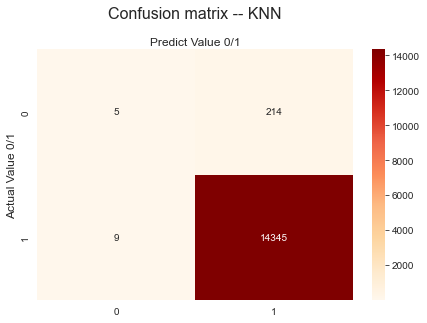

In [173]:
# Plot the matrix graph
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- KNN')

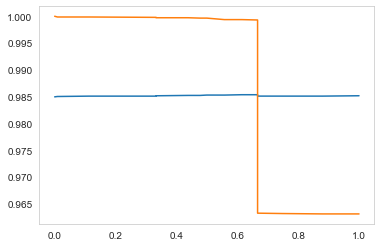

In [174]:
## Plot line graph
y_probabilities = knn_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()    

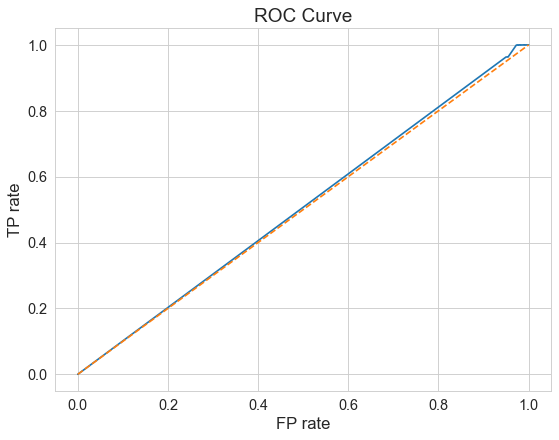

In [175]:
## Plot the ROC Curve
from sklearn.metrics import roc_curve
fprs2,tprs2,thresholds2 = roc_curve(y_test,y_probabilities)
plot_roc_curve(fprs2,tprs2)

In [176]:
# Get the area, which is equal to the score
from sklearn.metrics import roc_auc_score  
roc_auc_score(y_test,y_probabilities)

0.507095058224427

## Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=6)

In [126]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'max_features':['auto','sqrt','log2'],
        'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]
    }
]
grid_search = GridSearchCV(dt_clf,param_grid)

grid_search.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=6),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18]}])

In [127]:
grid_search.best_estimator_

DecisionTreeClassifier(max_features='auto', min_samples_leaf=2,
                       min_samples_split=6, random_state=6)

In [128]:
grid_search.best_score_

0.9833013084104717

In [129]:
dt_clf = grid_search.best_estimator_
dt_clf.score(X_train,y_train)

0.9836444322444872

In [130]:
## Get F1-score
y_predict_dt = dt_clf.predict(X_test)
f1_score(y_test,y_predict_dt)

0.9922523519645822

In [132]:
## Plot the matrix
print(classification_report(y_test,y_predict_dt))
cnf_matrix = confusion_matrix(y_test,y_predict_dt)
cnf_matrix

              precision    recall  f1-score   support

           0       0.33      0.02      0.04       219
           1       0.99      1.00      0.99     14354

    accuracy                           0.98     14573
   macro avg       0.66      0.51      0.52     14573
weighted avg       0.98      0.98      0.98     14573



array([[    5,   214],
       [   10, 14344]])

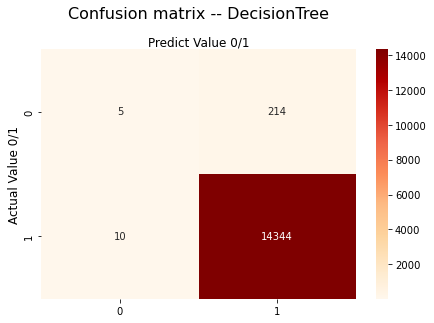

In [134]:
## Plot the heat graph
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- DecisionTree')

In [135]:
y_probabilities = dt_clf.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

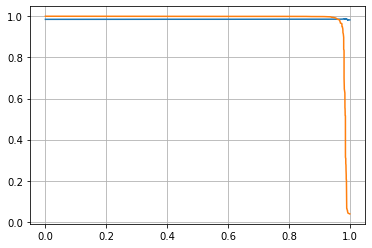

In [136]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()   

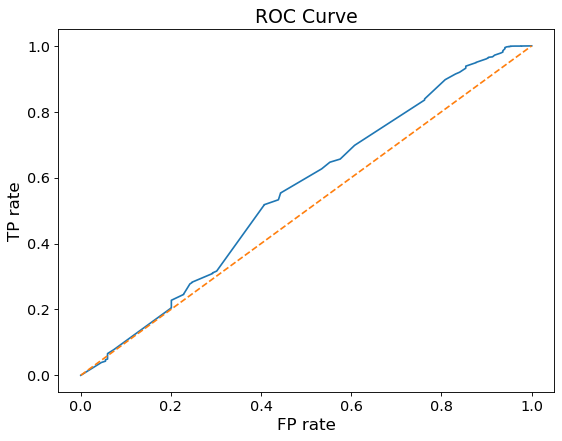

In [137]:
## Plot the ROC Curve
from sklearn.metrics import roc_curve
fprs3,tprs3,thresholds3 = roc_curve(y_test,y_probabilities)
plot_roc_curve(fprs3,tprs3)

In [138]:
# Get the area, which is equal to score
from sklearn.metrics import roc_auc_score  

roc_auc_score(y_test,y_probabilities)

0.5563318070217965

## VotingClassifier

In [142]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
        ('log_clf',log_reg),
        ('knn_clf',knn_clf),
        ('dt_clf',dt_clf)
],voting='soft')


In [143]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression()),
                             ('knn_clf', KNeighborsClassifier()),
                             ('dt_clf',
                              DecisionTreeClassifier(max_features='auto',
                                                     min_samples_leaf=2,
                                                     min_samples_split=6,
                                                     random_state=6))],
                 voting='soft')

In [144]:
voting_clf.score(X_train,y_train)

0.9834385579650471

In [145]:
voting_clf.score(X_test,y_test)

0.9849035888286557

In [147]:
## Get the F1-score
y_predict_voting = voting_clf.predict(X_test)
f1_score(y_test,y_predict_voting)

0.9923928077455049

In [152]:
## Plot the matrix
print(classification_report(y_test,y_predict_voting))
cnv_matrix = confusion_matrix(y_test,y_predict_voting)
cnv_matrix

              precision    recall  f1-score   support

           0       0.43      0.01      0.03       219
           1       0.99      1.00      0.99     14354

    accuracy                           0.98     14573
   macro avg       0.71      0.51      0.51     14573
weighted avg       0.98      0.98      0.98     14573



array([[    3,   216],
       [    4, 14350]])

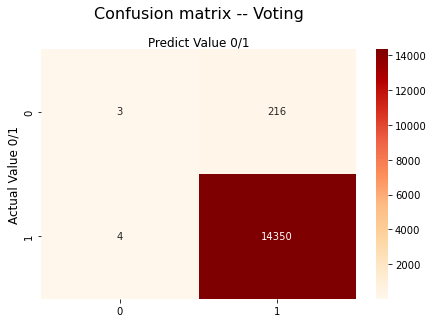

In [153]:
## Plot the heat graph
plot_cnf_matirx(cnv_matrix,'Confusion matrix -- Voting')

In [148]:
# Get the area, which is equal to score
y_probabilities = voting_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities)

0.5527278921822183

## Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500,random_state=666,oob_score=True,n_jobs=-1)
rf_clf.fit(X,y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=666)

In [158]:
rf_clf.oob_score_

0.9838563022182573

In [159]:
rf_clf.score(X_test,y_test)

/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


0.1391614629794826

In [160]:
## Get the area
y_probabilities_rf = rf_clf.predict_proba(X_test)[:,1]

roc_auc_score(y_test,y_probabilities_rf)

/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


0.499356773253983

In [161]:
## Updated area
y_probabilities = rf_clf.predict_proba(X)[:,1]

roc_auc_score(y,y_probabilities)

0.6249832867732362

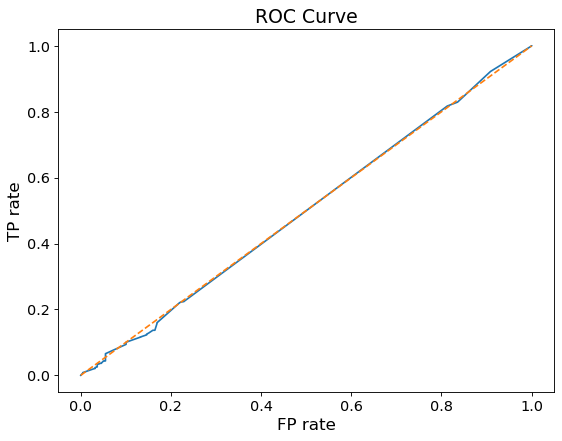

In [162]:
from sklearn.metrics import roc_curve
fprs4,tprs4,thresholds4 = roc_curve(y_test,y_probabilities_rf)
# Plot ROC Curve
plot_roc_curve(fprs4,tprs4)

## Plot these ROC curve together

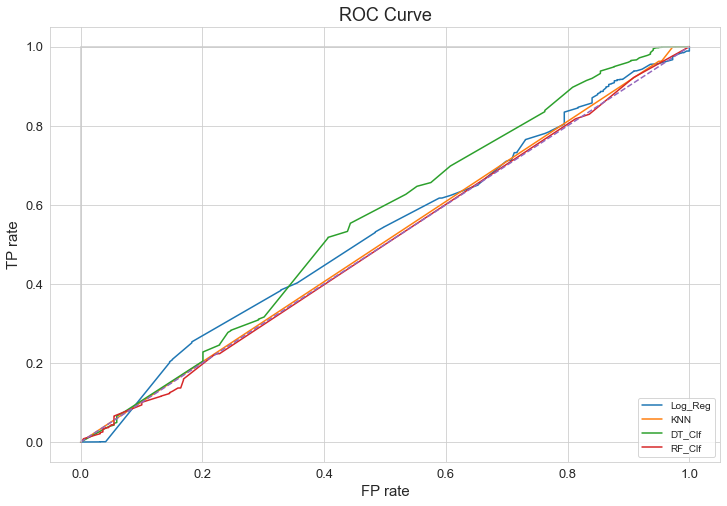

In [177]:
## Plot these curve together
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.title('ROC Curve',fontsize=18)
plt.plot(fprs,tprs,label='Log_Reg')
plt.plot(fprs2,tprs2,label='KNN')
plt.plot(fprs3,tprs3,label='DT_Clf')
plt.plot(fprs4,tprs4,label='RF_Clf')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.8')
plt.plot([1,1],c='.8')
plt.ylabel('TP rate',fontsize=15)
plt.xlabel('FP rate',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

# Predict the different sentence type of people

### We choose the raw data of cleaned df

In [40]:
sentence_cleaned = sentencing_cleaned_up[['is_black_derived','is_hisp_derived','is_white_derived','is_male_derived','senlength_derived','SENTENCE_TYPE']]
sentence_cleaned.head()

,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived,SENTENCE_TYPE
0,True,False,False,True,62.0,Prison
1,True,False,False,True,70.0,Prison
2,False,True,False,True,3.0,Prison
3,True,False,False,False,2.0,Probation
4,False,False,True,True,2.0,Probation


In [43]:
sentence_count = sentence_cleaned.groupby('SENTENCE_TYPE').agg(Number = ('senlength_derived', 'count')).reset_index()
sentence_count.sort_values(by='Number',ascending=False)

,SENTENCE_TYPE,Number
7,Prison,67502
8,Probation,54432
6,Jail,5496
1,Conditional Discharge,2224
12,Supervision,1737
0,2nd Chance Probation,1514
3,Cook County Boot Camp,145
11,Probation Terminated Unsatisfactorily,133
2,Conditional Release,52
9,Probation Terminated Instanter,46


### To keep the precion of machine predict, we choose the type with number over 1000 as examples

In [44]:
sentence_cleaned_fil = sentence_cleaned[sentence_cleaned.SENTENCE_TYPE.\
                                        isin(['Prison','Probation','Jail','Conditional Discharge','Supervision','2nd Chance Probation'])]
sentence_cleaned_fil.head()

,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived,SENTENCE_TYPE
0,1,0,0,1,62.0,Prison
1,1,0,0,1,70.0,Prison
2,0,1,0,1,3.0,Prison
3,1,0,0,0,2.0,Probation
4,0,0,1,1,2.0,Probation


### Rename the category to the number

In [46]:
## To predict the category of sentence type, we only subset the first 6 categories and rename them from 5 to 0
species_dict={
    '2nd Chance Probation': 0,
    'Supervision': 1,
    'Conditional Discharge': 2,
    'Jail': 3,
    'Probation' : 4,
    'Prison' :5
}
sentence_cleaned_fil['SENTENCE_TYPE_UPDATE'] = sentence_cleaned_fil.SENTENCE_TYPE.map(species_dict)

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/2747757774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [47]:
sentence_cleaned_fil.head()

,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived,SENTENCE_TYPE,SENTENCE_TYPE_UPDATE
0,1,0,0,1,62.0,Prison,5
1,1,0,0,1,70.0,Prison,5
2,0,1,0,1,3.0,Prison,5
3,1,0,0,0,2.0,Probation,4
4,0,0,1,1,2.0,Probation,4


In [65]:
sentence_cleaned_fil.describe()

,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived,SENTENCE_TYPE_UPDATE
count,132905.000000,132905.000000,132905.000000,132905.000000,132905.000000,132905.000000
mean,0.653677,0.186314,0.152064,0.871307,2.858158,4.348301
std,0.475799,0.389361,0.359084,0.334862,4.251369,0.891497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.500000,4.000000
50%,1.000000,0.000000,0.000000,1.000000,2.000000,5.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,405.000000,5.000000


50.52步需要思考一下有没有必要 因为是我们给命名的分类变量，感觉不太需要求linear regression model

In [50]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
from sklearn.model_selection import cross_val_score

In [52]:
## Linear Regression Model
features=['is_black_derived','is_hisp_derived','is_white_derived','is_male_derived','senlength_derived']
X = sentence_cleaned_fil[features]
y = sentence_cleaned_fil['SENTENCE_TYPE_UPDATE']
model = lm.fit(X,y)
print(model.intercept_, model.coef_)
scores = - cross_val_score(lm, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.mean(scores))

3.593828980279709 [0.37819648 0.12400566 0.14131723 0.41093498 0.03660065]
0.7470411331266474


## Logistic Regression Model

In [59]:
features=['is_black_derived','is_hisp_derived','is_white_derived','is_male_derived','senlength_derived']
X = sentence_cleaned_fil[features]
y = sentence_cleaned_fil['SENTENCE_TYPE_UPDATE']

In [60]:
## Logistic Regression Model
model_log = linear_model.LogisticRegression()
model_log.fit(X,y)
#Assess the model
scores = cross_val_score(model_log, X, y, cv=5, scoring='accuracy')    
print(np.mean(scores))

/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
/Users/leowu/opt/anaco

0.6130619615514841


/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## K Neighbors

In [56]:
## K Neighbors
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(5, weights='uniform')
knn.fit(X,y)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy') 
print(np.mean(scores))

0.6945336894774463


## Design Trees

In [61]:
## Design Trees
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X,y)
scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy') 
print(np.mean(scores))

0.7915578796884992


## Random Forest

In [63]:
## Random Forest
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X,y)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy') 
print(np.mean(scores))

0.7913848237462849


In [66]:
corr=sentence_cleaned_fil[['is_black_derived','is_hisp_derived','is_white_derived','is_male_derived','senlength_derived']].corr()
corr

,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,senlength_derived
is_black_derived,1.000000,-0.657408,-0.581798,0.007580,0.042055
is_hisp_derived,-0.657408,1.000000,-0.202640,0.061905,-0.018534
is_white_derived,-0.581798,-0.202640,1.000000,-0.074033,-0.033733
is_male_derived,0.007580,0.061905,-0.074033,1.000000,0.072162
senlength_derived,0.042055,-0.018534,-0.033733,0.072162,1.000000


<AxesSubplot:>

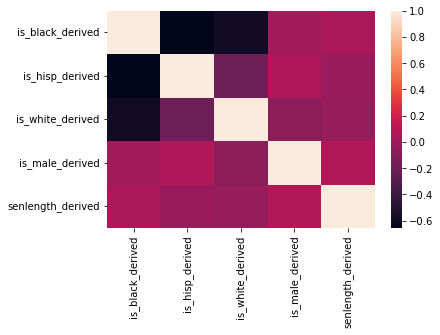

In [68]:
import seaborn as sns
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Create character and target variables
x= sentence_cleaned_fil.drop(['SENTENCE_TYPE','SENTENCE_TYPE_UPDATE'],axis=1)
x= pd.get_dummies(x) #Create dummy variables
y= sentence_cleaned_fil['SENTENCE_TYPE_UPDATE']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 10)#建立训练集和测试集

#Train the model
logit = LogisticRegression()
print(logit.fit(x_train,y_train))
print(logit.score(x_train,y_train))
print(logit.score(x_test,y_test))

#Predict
predict=logit.predict(x_test)
print('predict',predict)

#Grade the accuracy
Score = accuracy_score(y_test, predict)
Score

LogisticRegression()
0.64530115496031
0.6390278770550393
predict [5 5 4 ... 4 5 5]


/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6390278770550393

In [81]:
## Get f1-score indicator
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       303
           1       0.00      0.00      0.00       369
           2       0.00      0.00      0.00       446
           3       0.87      0.23      0.37      1104
           4       0.59      0.55      0.57     10838
           5       0.67      0.79      0.72     13521

    accuracy                           0.64     26581
   macro avg       0.35      0.26      0.28     26581
weighted avg       0.62      0.64      0.62     26581



/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/Users/leowu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [82]:
# Plot the matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix


array([[    0,     0,     0,     0,   198,   105],
       [    0,     0,     0,     0,   262,   107],
       [    0,     0,     0,     4,   318,   124],
       [    0,     0,     0,   258,   628,   218],
       [    0,     0,     0,    23,  5981,  4834],
       [    0,     0,     0,    10,  2764, 10747]])

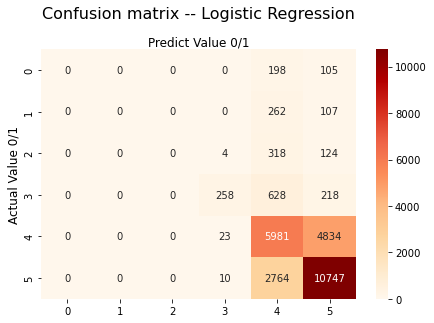

In [84]:
import matplotlib.pyplot as plt
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

# Create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('Actual Value 0/1',fontsize=12)
    plt.xlabel('Predict Value 0/1',fontsize=12)
    plt.show()
    
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')


In [178]:
decision_scores = logit.decision_function(x_test)
print(decision_scores)
from sklearn.metrics import precision_recall_curve

[[-1.37833145 -1.98007192 -1.39407396 -0.51047575  2.41044964  2.85250344]
 [-0.77706417 -1.99651207 -1.37752025 -1.81020522  2.91486319  3.04643852]
 [-1.48407788 -1.3729347  -0.69181826 -1.0299016   2.52231546  2.05641698]
 ...
 [-1.3627408  -1.32183916 -1.03138391 -0.77683202  2.39525261  2.09754328]
 [-0.20697819 -3.32941775 -2.08634665 -2.57722215  3.44967081  4.75029392]
 [-1.96400808 -1.30539901 -1.04793761  0.52289745  1.89083906  1.9036082 ]]


In [ ]:
precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()   

# Predict the sentence length of people

In [365]:
sentencing_sent = sentencing_cleaned_upd[['is_changed_offense','is_black_derived','is_hisp_derived'\
                                         ,'is_white_derived','is_male_derived','Incar','age_derived','sentenceym_derived','senlength_derived']]
sentencing_sent['age_derived']=sentencing_sent['age_derived'].fillna(sentencing_sent['age_derived'].mean() )
sentencing_sent.head()

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/4183380707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,is_changed_offense,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,Incar,age_derived,sentenceym_derived,senlength_derived
0,True,True,False,False,True,True,27.0,2014-10-01,62.0
1,True,True,False,False,True,True,30.0,2014-08-01,70.0
2,False,False,True,False,True,True,38.0,2013-12-01,3.0
3,True,True,False,False,False,False,33.0,2012-09-01,2.0
4,False,False,False,True,True,False,49.0,2014-09-01,2.0


In [366]:
le = LabelEncoder()
le.fit(sentencing_sent['is_black_derived']) 
sentencing_sent['is_black_derived'] = le.transform(sentencing_sent['is_black_derived'])   
sentencing_sent['is_white_derived'] = le.transform(sentencing_sent['is_white_derived'])
sentencing_sent['is_hisp_derived'] = le.transform(sentencing_sent['is_hisp_derived'])
sentencing_sent['is_male_derived'] = le.transform(sentencing_sent['is_male_derived'])
sentencing_sent['is_changed_offense'] = le.transform(sentencing_sent['is_changed_offense'])
sentencing_sent['Incar'] = le.transform(sentencing_sent['Incar'])

/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/2810892458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/2810892458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/2810892458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [367]:
sentencing_sent.head()

,is_changed_offense,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,Incar,age_derived,sentenceym_derived,senlength_derived
0,1,1,0,0,1,1,27.0,2014-10-01,62.0
1,1,1,0,0,1,1,30.0,2014-08-01,70.0
2,0,0,1,0,1,1,38.0,2013-12-01,3.0
3,1,1,0,0,0,0,33.0,2012-09-01,2.0
4,0,0,0,1,1,0,49.0,2014-09-01,2.0


In [370]:
sentencing_sente = sentencing_sent.drop(['sentenceym_derived'],axis=1)

In [371]:
## Describe the data
sentencing_sente.describe(include='all')

,is_changed_offense,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,Incar,age_derived,senlength_derived
count,133373.000000,133373.000000,133373.000000,133373.000000,133373.000000,133373.000000,133373.000000,133373.000000
mean,0.100763,0.653551,0.186282,0.152227,0.871308,0.511543,33.463300,2.859283
std,0.301015,0.475840,0.389336,0.359242,0.334860,0.499869,11.679296,4.286118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,1.500000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,31.000000,2.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,41.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,405.000000


In [373]:
corrDf = sentencing_sente.corr() 
corrDf

,is_changed_offense,is_black_derived,is_hisp_derived,is_white_derived,is_male_derived,Incar,age_derived,senlength_derived
is_changed_offense,1.000000,-0.052664,0.053264,0.009792,-0.004055,0.000966,-0.007853,0.084164
is_black_derived,-0.052664,1.000000,-0.657156,-0.582004,0.007554,0.183582,-0.014539,0.041649
is_hisp_derived,0.053264,-0.657156,1.000000,-0.202747,0.061959,-0.119712,-0.042132,-0.018568
is_white_derived,0.009792,-0.582004,-0.202747,1.000000,-0.073994,-0.104795,0.062578,-0.033147
is_male_derived,-0.004055,0.007554,0.061959,-0.073994,1.000000,0.186705,-0.031590,0.071601
Incar,0.000966,0.183582,-0.119712,-0.104795,0.186705,1.000000,0.042767,0.237714
age_derived,-0.007853,-0.014539,-0.042132,0.062578,-0.031590,0.042767,1.000000,-0.033063
senlength_derived,0.084164,0.041649,-0.018568,-0.033147,0.071601,0.237714,-0.033063,1.000000


<AxesSubplot:>

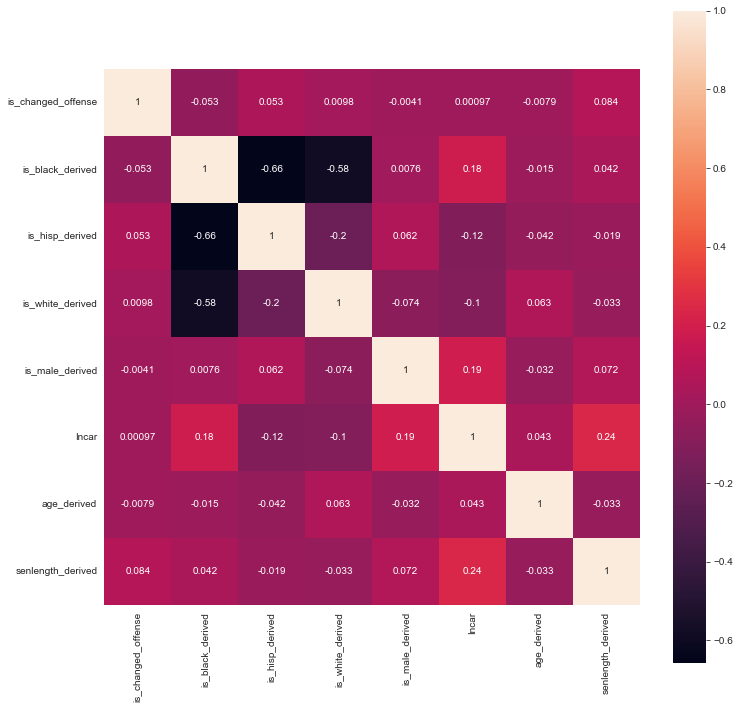

In [295]:
import seaborn as sns

fig=plt.figure(figsize=(12,12))
sns.heatmap(sentencing_sent.corr(),vmax=1,square=True,annot=True)

## Features and Labels and Convert Data to Arrays

In [313]:
# Labels are the values we want to predict
labels = np.array(sentencing_sente['senlength_derived'])

# Remove the labels from the features
# axis 1 refers to the columns
features= sentencing_sente.drop('senlength_derived', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

## Training and Testing Sets

In [314]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [316]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (100029, 7)
Training Labels Shape: (100029,)
Testing Features Shape: (33344, 7)
Testing Labels Shape: (33344,)


## Train Model

In [318]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

## Make Predictions on Test Data

In [319]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.64 degrees.


## Determine Performance Metrics

In [339]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/3952369233.py:2: RuntimeWarning: divide by zero encountered in true_divide


## Improve the model

In [340]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

## Interpret Model Results
### Visualizing a Single Decision Tree

In [344]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
!pip install pydot
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)



In [348]:
import os
print (os.path.abspath('tree.dot'))


/Users/leowu/Desktop/Study_Materials/Data_Science1/Final-Project-Group5/tree.dot


In [350]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('/Users/leowu/Desktop/tree.dot')

In [354]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 21


In [359]:
!pip install graphviz

## Variable Importances

In [361]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Incar                Importance: 0.58
Variable: age_derived          Importance: 0.19
Variable: is_changed_offense   Importance: 0.12
Variable: is_male_derived      Importance: 0.04
Variable: is_black_derived     Importance: 0.02
Variable: is_hisp_derived      Importance: 0.02
Variable: is_white_derived     Importance: 0.02


## Model with Two Most Important Features

In [363]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('Incar'), feature_list.index('age_derived')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.63 degrees.
Accuracy: -inf %.


/var/folders/39/p0rpjrxj68l4cbrkhyvw78fm0000gn/T/ipykernel_76237/3181406501.py:20: RuntimeWarning: divide by zero encountered in true_divide


## Visualizations
### Variable Importances

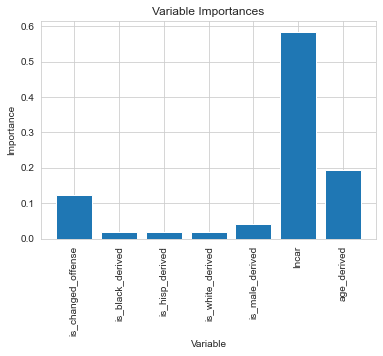

In [364]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 